In [1]:
import sys
sys.path.insert(0,"/home/yunye/work/gwaslab/src")
import gwaslab as gl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
import scipy as sp
from gwaslab.Log import Log

In [2]:
mysumstats = pd.read_csv("t2d_bbj.txt.gz",sep="\t",nrows=1000000)
mysumstats

,SNP,CHR,POS,REF,ALT,Frq,BETA,SE,P,Dir,HetP,N
0,1:725932_G_A,1,725932,A,G,0.0040,-0.0737,0.1394,0.59700,-?+-,0.4502,166718
1,1:725933_A_G,1,725933,A,G,0.9960,0.0737,0.1394,0.59730,+?-+,0.4505,166718
2,1:737801_T_C,1,737801,T,C,0.9949,0.0490,0.1231,0.69080,+?-+,0.4599,166718
3,1:749963_T_TAA,1,749963,T,TAA,0.1626,0.0213,0.0199,0.28460,-?++,0.3200,166718
4,1:751343_T_A,1,751343,A,T,0.1407,0.0172,0.0156,0.27050,-?++,0.3884,166718
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2:6347639_C_A,2,6347639,A,C,0.2100,-0.0159,0.0111,0.15100,---+,0.2437,191764
999996,2:6347694_G_C,2,6347694,C,G,0.2093,-0.0151,0.0111,0.17250,---+,0.2451,191764
999997,2:6348478_G_A,2,6348478,A,G,0.2140,-0.0152,0.0111,0.17160,---+,0.2443,191764
999998,2:6348490_G_C,2,6348490,C,G,0.0015,-0.3180,0.2032,0.11750,+---,0.1930,191764


In [3]:
gl.get_power(mode="q",eaf=0.5,beta=0.1,n=4000)

Wed Jun 21 02:05:42 2023 Significance level: 5e-08
Wed Jun 21 02:05:42 2023 EAF: 0.5
Wed Jun 21 02:05:42 2023 BETA: 0.1
Wed Jun 21 02:05:42 2023 N: 4000
Wed Jun 21 02:05:42 2023 H2: 0.005000000000000001


0.13541891127685057

In [13]:
x = np.linspace(0,1,100)
xpower = gl.get_beta(mode="q",eaf=x, n=100000,t=0.8,n_matrix=1000)

,0,1
0,0.498999,0.030130
1,0.498499,0.030130
2,0.497998,0.030130
3,0.497498,0.030130
4,0.496998,0.030130
...,...,...
993,0.002102,0.290387
994,0.001601,0.320417
995,0.001101,0.360457
996,0.000600,0.440536


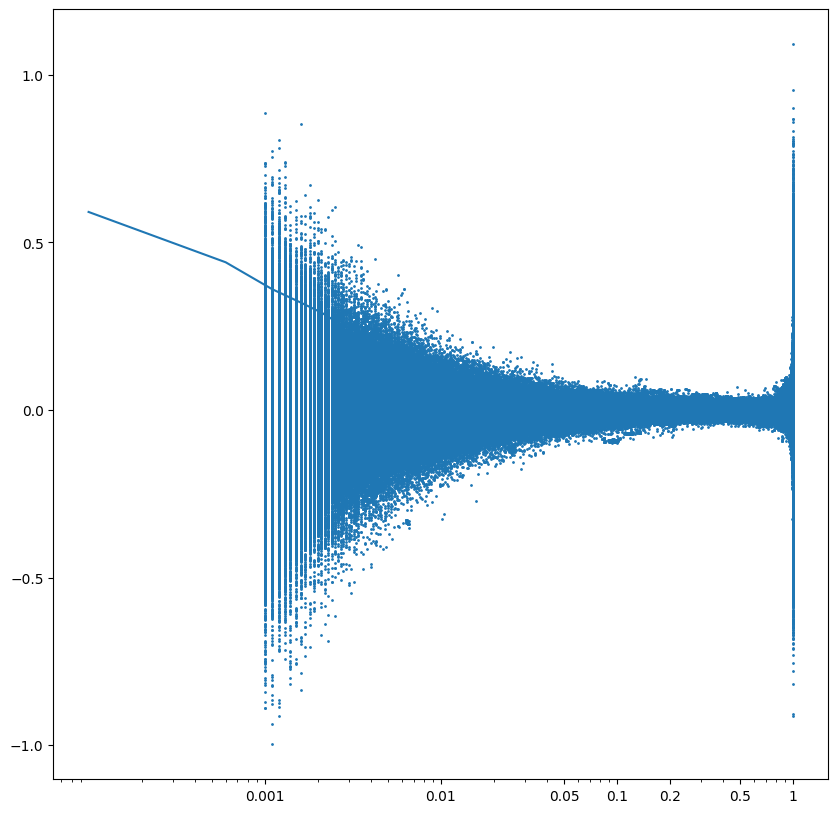

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(mysumstats["Frq"],mysumstats["BETA"],s=1)
ax.set_xscale('log')
ax.plot(xpower[0],xpower[1])
ax.set_xticks([0.001,0.01,0.05,0.1,0.2,0.5,1],[0.001,0.01,0.05,0.1,0.2,0.5,1])

xpower